Estimators (i.e., data modeling techniques for Estimation) take a list of input attributes and assign a numeric value to the target class demonstrating these attributes. Suppose the marketing manager wants to estimate the likelihood that a given customer will churn based on his/her demographic and transaction profiles. This data analysis task is an example of Estimation with numeric prediction, where the model created predicts a continuous-valued or ordered value instead of a categorical label.  

Regression is a statistical method and is the most commonly used for Estimation problems. Therefore, sometimes the Estimation is also called Regression prediction.

Classification and Estimation are the two major types of prediction problems. Both Classification and Estimation have a similar predictive modeling process, as Figure 2 of Section 5.1. However, for Estimation, the terminology of "target label attribute" is no longer applicable because the target attribute for which values are being predicted is a continuous value type (or ordered) instead of categorical (discrete and unordered). 

In our mini-case study of customer churn example, instead of predicting if a given customer is going to churn or not, it would be possible for the customer relationship department manager to understand the likelihood of churn in terms of ratio. With this possibility, the data mining problem to solve becomes Estimation instead of Classification. We would replace the categorical target attribute, churn, with the continuous-valued between 0 and 1 as the estimated attribute value and develop a predictive model for the case.

In this section, we will implement Estimation to estimate the likelihood that a given customer will churn based on his/her demographic and transaction profiles. 

For the purpose of demonstrating the concept of Estimation modeling, and reusing the same churn dataset,  we need to transform the initially categorical target attribute type values ('yes' or 'no')  with numeric  values (1 or 0), though not semantically precise but somehow the 1 and 0 present a churn estimate value. 

The following Python codes show the example implementation of the data modeling phase to solve the Estimation problem using the Pyhton-supported Decision Tree Regressor algorithm.  The comments embedded in the codes give explanations to guide the rationale of the programming logic.

In [3]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor  

# specify dataset source, train and test sets
df = pd.read_csv('ChurnFinal.csv')

# Convert all the attributes' data type to numeric for Estimation 
df.loc[df['Churn'] == 'yes', 'Churn'] = 1
df.loc[df['Churn'] == 'no', 'Churn'] = 0
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce').astype('float')

# specify inputs and label 
df_inputs = pd.get_dummies(df[['Gender', 'Age', 'PostalCode', 'Cash', 'CreditCard', 
            'Cheque','SinceLastTrx', 'SqrtTotal', 'SqrtMax', 'SqrtMin']])
df_label = df['Churn']

#The random state is a ransom seed number generator to ensure same order numbers.
#Using splitter=best, the model takes the feature with the highest importance 
min_sample = int(len(df) * 0.1)     # example of assigning the minimmum sample size

# create a decision tree regressor object
dtree_rg = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.005, #min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=min_sample,
                      min_weight_fraction_leaf=0.0, #presort='deprecated',
                      random_state=7, splitter='best') 

# split the data set to train (ratio of 0.8) and test sets (ratio of 0.2)
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_label, 
                       test_size=0.2, random_state=7) 

# fit the decision tree regressor
dtree_rg.fit(X_train, y_train)

#Predict the response for test dataset
y_predict = dtree_rg.predict(X_test)

# Calculating Mean squared error
print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, y_predict),3))  


Mean Squared Error (MSE):  0.201


After running all the codes together given above, we obtain the model performance in Mean Squared Error (MSE) of 0.201 printed on the console terminal as Mean Squared Error (MSE): 0.201. This error indicates that the model has a variance of 0.201 in predicting the estimated churn likelihood compared to the actual value.

Besides MSE, we will examine more measures of model performance in Week 6. 

To view the generated decision tree structure, we can plot the tree using the following Python codes:

<Figure size 640x480 with 0 Axes>

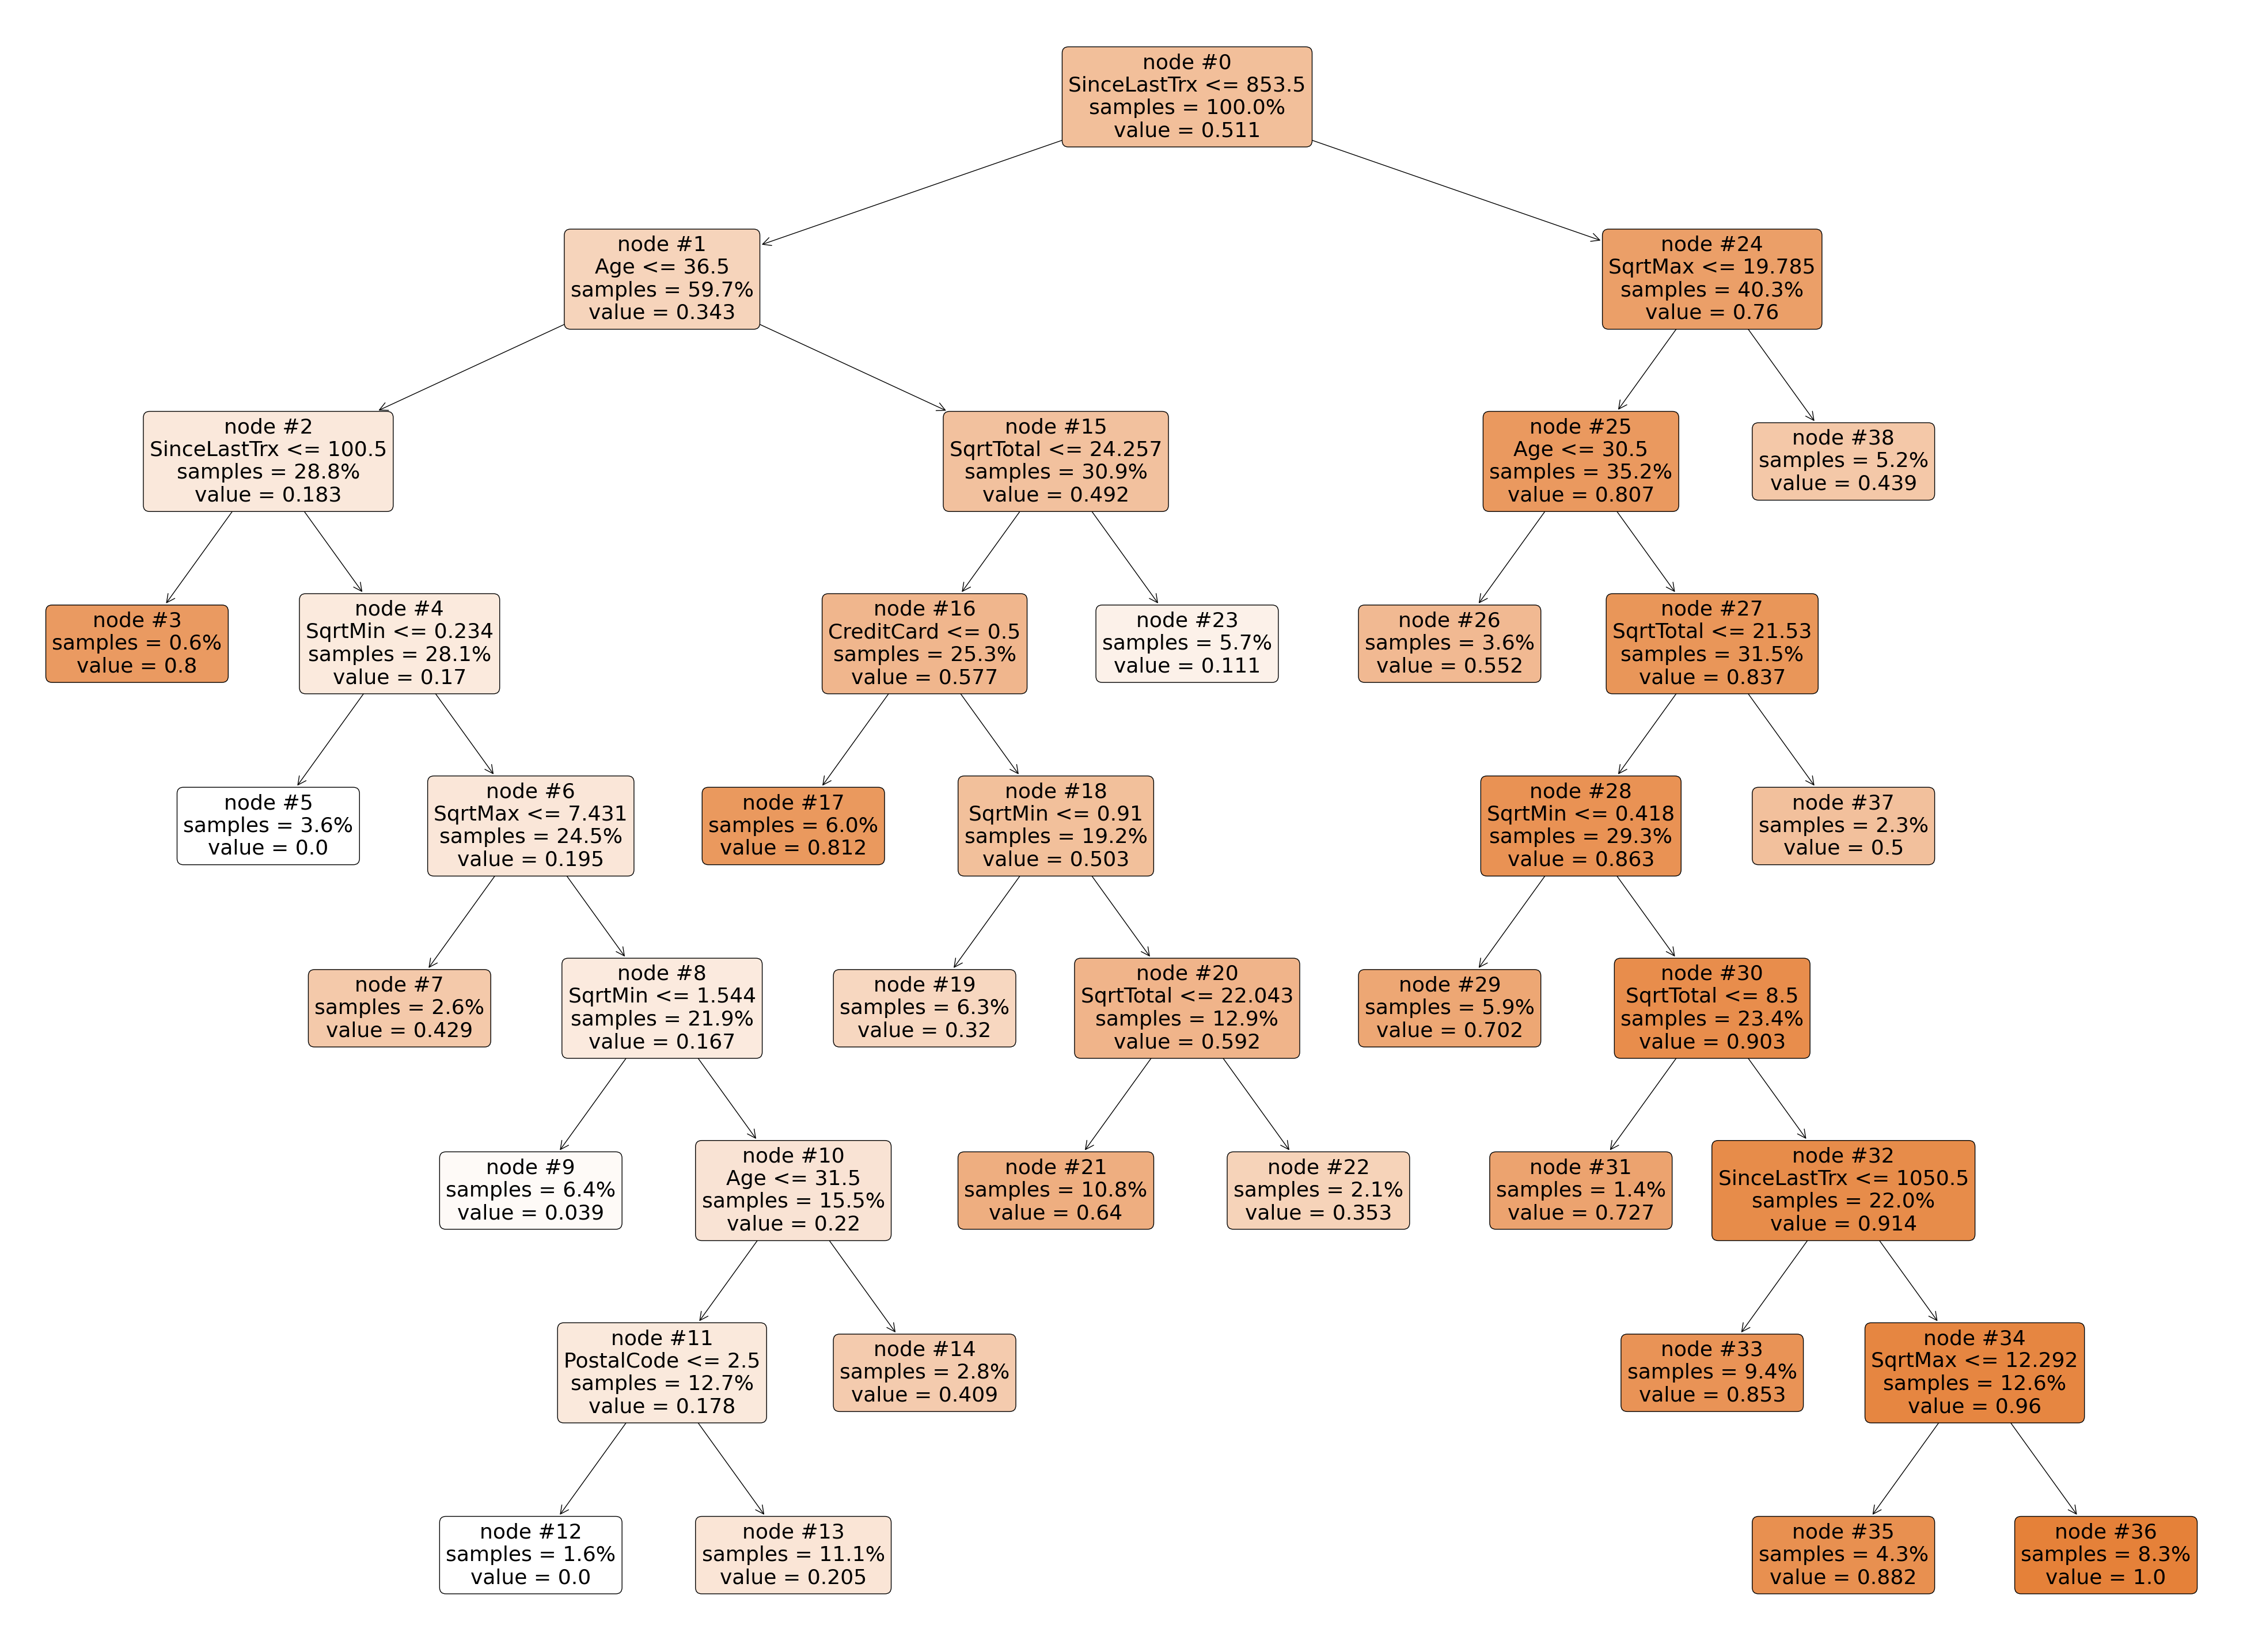

In [4]:
#plot tree
from sklearn import tree
from matplotlib import pyplot as plt
import os
plt.clf()
target = list(df['Churn'].unique())
feature_names = list(df_inputs.columns)
strFile = "plot_dtree.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
fig = plt.figure(figsize=(50,37))
_ = tree.plot_tree(dtree_rg, feature_names=feature_names, class_names=target, filled=True,
        label='all', node_ids=True, proportion=True,rounded=True, impurity=False)
fig.savefig(strFile)

The above codes plot the tree and save it in the plot_dtree.png file. After running the codes, the generated model tree structure view is as follows: 


Observe that instead of giving each label ('yes' or 'no') ratio in a node as in Decision Tree for solving Classification problem, Estimation using DecisionTreeRegressor() function presents the likelihood of churn. For example, in node #7, the value of 0.807 indicates the likelihood of churn is 0.807, which is near the value of 1, implying a given customer who satisfies the rule of node#7 is more likely to churn than no churn. 

 

For a detailed explanation of the DecisionTreeRegressor() API parameters, refer to the official website, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontree%20regressor#sklearn.tree.DecisionTreeRegressor. 